In [1]:
# Common stuff reused by all applications
from analysis_common import *
%matplotlib inline


EXPERIMENT_SIZE_FIELDS = [
    "n_blocks_fit",
    "n_blocks_nn",
    "points_per_block",
]

PLATFORM_FIELDS = [
    "nodes",
    "cpus_per_node",
    "backends_per_node",
]

HANDPICKED_OUTLIERS = []

In [2]:
db = DataStorage("nn-split")
df = prepare_df(db, HANDPICKED_OUTLIERS)

df.drop(df[(df['id'] < 27779773) & (df['dask'] == 1)].index, inplace=True)

df.query("start_ts > '2022-06-01'", inplace=True)

# Some bogus executions when testing copy stuff flags
df.query("(id < 24082000) or (id > 24083000)", inplace=True)

# I botched up a series of execution that are useless
df.query("n_blocks_fit >= ((nodes - 1) * 2)", inplace=True)

# And dask started somewhat flacky
df.drop(df[(df['id'] < 28201850) & (df['dask'] == 1)].index, inplace=True)
df.drop(df[(df['id'] < 28256537) & (df['dask'] == 1) & (df["use_split"] == 1)].index, inplace=True)

In [3]:
edf = df.explode("kneighbors_time").sort_values('mode')
edf['kneighbors_time'] = edf['kneighbors_time'].astype(float)
edf['fit_time'] = edf['fit_time'].astype(float)
edf['nodes'] = edf['nodes'].astype(int)

#winsorize_edf(edf, "kneighbors_time", ["mode", "nodes", "n_blocks_fit", "n_blocks_nn", "points_per_block"])
#winsorize_edf(edf, "fit_time", ["mode", "nodes", "n_blocks_fit", "n_blocks_nn", "points_per_block"])

/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


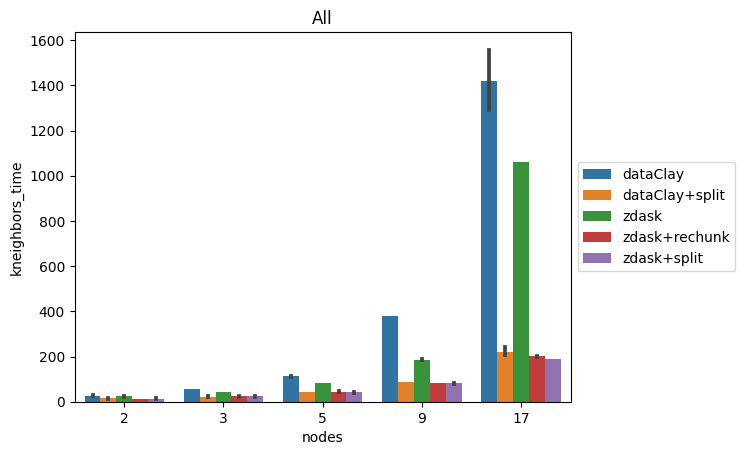

<Figure size 640x480 with 0 Axes>

/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


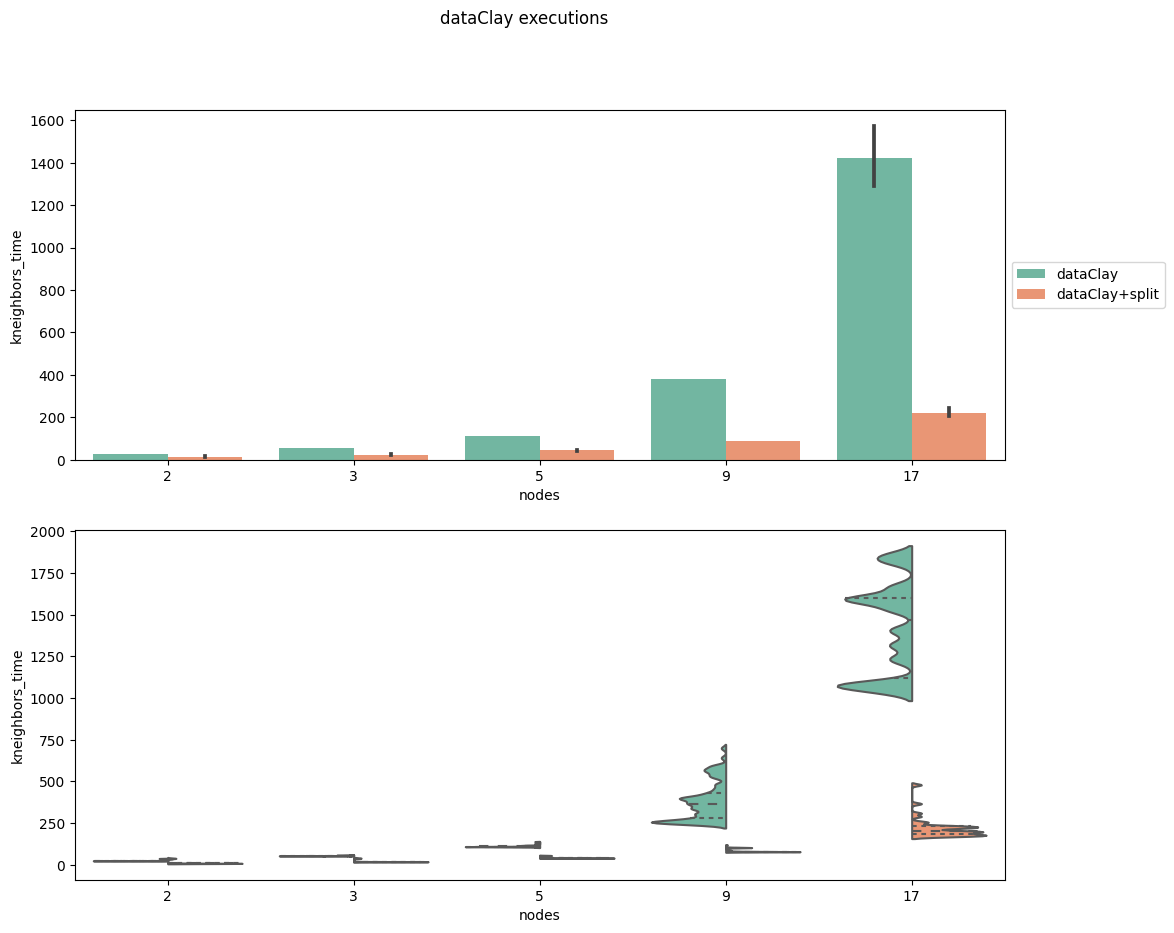

/tmp/ipykernel_220104/289638552.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(["nodes", "mode"]).mean()


id  dataclay  use_split  backends_per_node  \
nodes mode                                                                   
2     dataClay        2.400638e+07       1.0        0.0                2.0   
      dataClay+split  2.400638e+07       1.0        1.0                2.0   
      zdask           2.820190e+07       NaN        0.0                NaN   
      zdask+rechunk   2.820190e+07       NaN        0.0                NaN   
      zdask+split     2.825654e+07       NaN        1.0                NaN   
3     dataClay        2.400640e+07       1.0        0.0                2.0   
      dataClay+split  2.400640e+07       1.0        1.0                2.0   
      zdask           2.820193e+07       NaN        0.0                NaN   
      zdask+rechunk   2.820194e+07       NaN        0.0                NaN   
      zdask+split     2.825656e+07       NaN        1.0                NaN   
5     dataClay        2.400641e+07       1.0        0.0                2.0   
      dataClay+split  2.401329e+07       1.0        1.0                2.0   
      zdask           2.820197e+07       NaN        0.0                NaN   
      zdask+rechunk   2.820197e+07       NaN        0.0                NaN   
      zdask+split     2.825657e+07       NaN        1.0                NaN   
9     dataClay        2.429932e+07       1.0        0.0                2.0   
      dataClay+split  2.426927e+07       1.0        1.0                2.0   
      zdask           2.821536e+07       NaN        0.0                NaN   
      zdask+rechunk   2.821536e+07       NaN        0.0                NaN   
      zdask+split     2.825660e+07       NaN        1.0                NaN   
17    dataClay        2.410129e+07       1.0        0.0                2.0   
      dataClay+split  2.392135e+07       1.0        1.0                2.0   
      zdask           2.822042e+07       NaN        0.0                NaN   
      zdask+rechunk   2.822042e+07       NaN        0.0                NaN   
      zdask+split     2.825659e+07       NaN        1.0                NaN   

                      cpus_per_node  computing_units  initialization_time  \
nodes mode                                                                  
2     dataClay                 48.0              1.0            43.254162   
      dataClay+split           48.0              1.0            43.008473   
      zdask                     NaN              NaN             1.451891   
      zdask+rechunk             NaN              NaN             1.381526   
      zdask+split               NaN              NaN             1.308502   
3     dataClay                 48.0              1.0            50.508684   
      dataClay+split           48.0              1.0            50.608463   
      zdask                     NaN              NaN             1.461288   
      zdask+rechunk             NaN              NaN             1.442515   
      zdask+split               NaN              NaN             1.399562   
5     dataClay                 48.0              1.0            87.723897   
      dataClay+split           48.0              1.0            87.271554   
      zdask                     NaN              NaN             1.557089   
      zdask+rechunk             NaN              NaN             1.503231   
      zdask+split               NaN              NaN             1.433522   
9     dataClay                 48.0              1.0           166.057354   
      dataClay+split           48.0              1.0           165.346927   
      zdask                     NaN              NaN             1.533250   
      zdask+rechunk             NaN              NaN             1.550215   
      zdask+split               NaN              NaN             1.489726   
17    dataClay                 48.0              1.0           318.160056   
      dataClay+split           48.0              1.0           318.500718   
      zdask                     NaN              NaN             1.653811   


In [4]:
data = edf.query('(nodes - 1) * 6 == n_blocks_fit')
kneighbors_data = data.copy()
kneighbors_data["nodes"] -= 1


#hue_order=["COMPSs", "dataClay[no copy]", "dataClay+split[no copy]", "dataClay", "dataClay+split", "zdask", "zdask+rechunk", "zdask+split", "zdask[no copy]", "zdask+rechunk[no copy]", "zdask+split[no copy]"]
#hue_order=["dataClay", "dataClay+split", "zdask", "zdask+rechunk", "zdask+split", "zdask[no copy]", "zdask+rechunk[no copy]"]
hue_order=["dataClay", "dataClay+split", "zdask", "zdask+rechunk", "zdask+split"]
plot_things(data, "kneighbors_time", hue_order=hue_order)

# sns.barplot(data=data, x="nodes", hue="mode", y="kneighbors_time")
# plt.title("6 blocks per node")
# plt.show()

data.groupby(["nodes", "mode"]).mean()

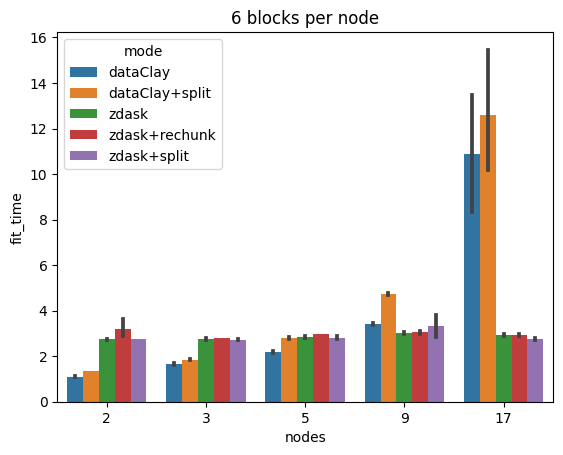

In [5]:
data = edf.query('(nodes - 1) * 2 == n_blocks_fit')
sns.barplot(data=data, x="nodes", hue="mode", y="fit_time")
plt.title("6 blocks per node")
plt.show()

In [6]:
#data

Remember: when evaluating split overhead, the overhead is not only the split but also the added cost of fit.

/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


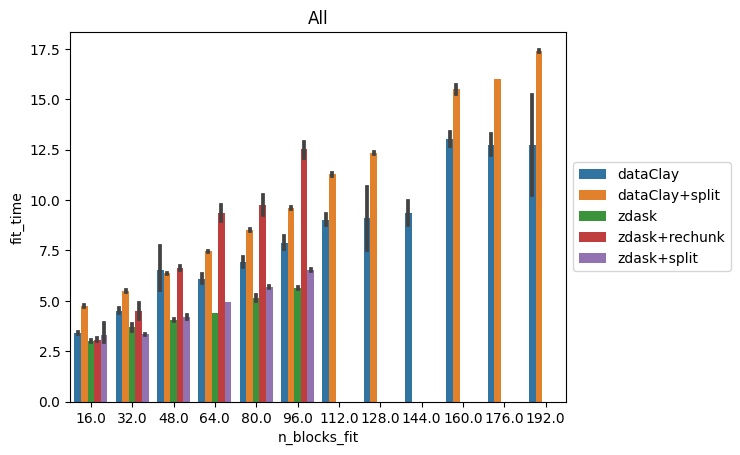

/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.a

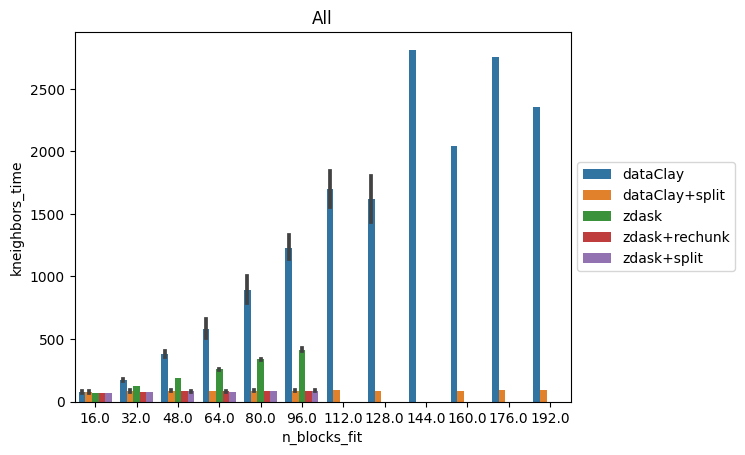

In [7]:
# Some random scalability whatevers, explain it better
data = edf.query("(nodes == 9)")

sns.barplot(data=data, x="n_blocks_fit", hue="mode", y="fit_time")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("All")
# TODO: Change granularity_index to: fragments per core [o algo així]
plt.show()

sns.barplot(data=data, x="n_blocks_fit", hue="mode", y="kneighbors_time")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("All")
# TODO: Change granularity_index to: fragments per core [o algo així]
plt.show()


In [8]:
#mean_data = data.query("copy_fit_struct != 0").query("n_blocks_fit < 100").groupby(["n_blocks_fit", "mode"]).mean()
mean_data = data.query("n_blocks_fit < 100").groupby(["n_blocks_fit", "mode"]).mean()

/tmp/ipykernel_220104/2651987597.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data = data.query("n_blocks_fit < 100").groupby(["n_blocks_fit", "mode"]).mean()


In [9]:
from math import log2

for (n_blocks_fit, mode), values in mean_data.iterrows():
    if mode == "COMPSs":
        mean_data.at[(n_blocks_fit, mode), "speedup"] = (n_blocks_fit) / values["kneighbors_time"]
    else:
        #mean_data.at[(n_blocks_fit, mode), "speedup"] = mean_data.at[(n_blocks_fit, "COMPSs"), "kneighbors_time"] / values["kneighbors_time"]
        mean_data.at[(n_blocks_fit, mode), "speedup"] = (n_blocks_fit) / values["kneighbors_time"]

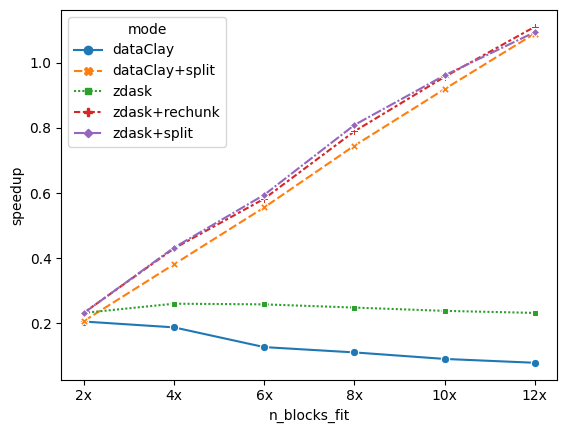

In [10]:
ax = sns.lineplot(data=mean_data, style="mode", markers=True, x="n_blocks_fit", hue="mode", y="speedup")
ax.set(xticks=[16, 32, 48, 64, 80, 96], xticklabels=["2x", "4x", "6x", "8x", "10x", "12x"])
#ax.set(yscale='log')
plt.show()

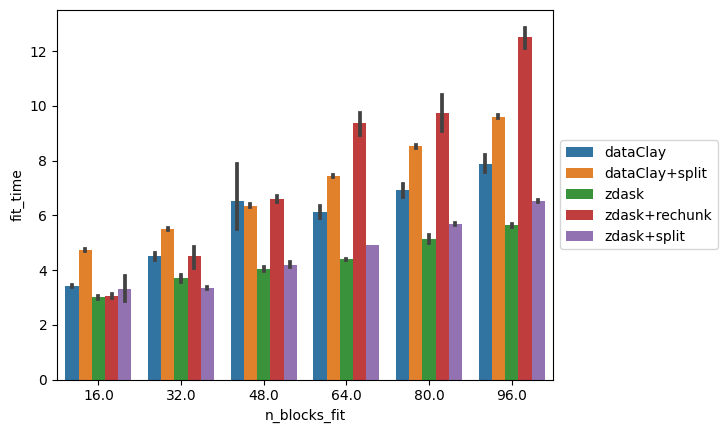

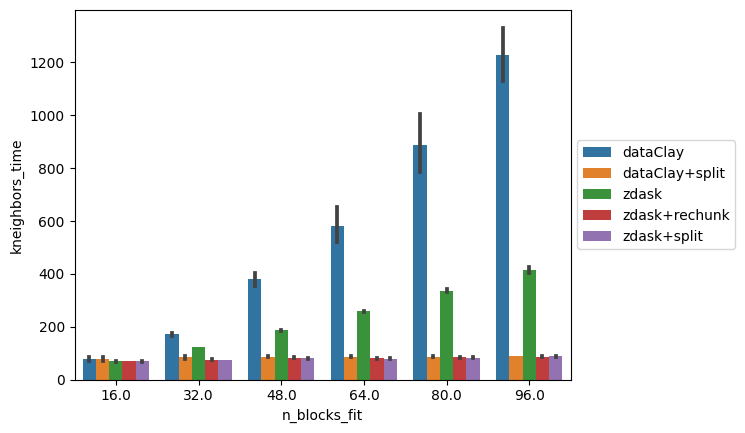

/tmp/ipykernel_220104/204844814.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(["n_blocks_fit", "mode"]).mean()


id  dataclay  use_split  nodes  \
n_blocks_fit mode                                                       
16.0         dataClay        2.493056e+07       1.0        0.0    9.0   
             dataClay+split  2.490692e+07       1.0        1.0    9.0   
             zdask           2.821532e+07       NaN        0.0    9.0   
             zdask+rechunk   2.821532e+07       NaN        0.0    9.0   
             zdask+split     2.825659e+07       NaN        1.0    9.0   
32.0         dataClay        2.437022e+07       1.0        0.0    9.0   
             dataClay+split  2.434570e+07       1.0        1.0    9.0   
             zdask           2.820208e+07       NaN        0.0    9.0   
             zdask+rechunk   2.820208e+07       NaN        0.0    9.0   
             zdask+split     2.825660e+07       NaN        1.0    9.0   
48.0         dataClay        2.429932e+07       1.0        0.0    9.0   
             dataClay+split  2.426927e+07       1.0        1.0    9.0   
             zdask           2.821536e+07       NaN        0.0    9.0   
             zdask+rechunk   2.821536e+07       NaN        0.0    9.0   
             zdask+split     2.825660e+07       NaN        1.0    9.0   
64.0         dataClay        2.459384e+07       1.0        0.0    9.0   
             dataClay+split  2.442320e+07       1.0        1.0    9.0   
             zdask           2.820212e+07       NaN        0.0    9.0   
             zdask+rechunk   2.820212e+07       NaN        0.0    9.0   
             zdask+split     2.825662e+07       NaN        1.0    9.0   
80.0         dataClay        2.482723e+07       1.0        0.0    9.0   
             dataClay+split  2.443522e+07       1.0        1.0    9.0   
             zdask           2.820213e+07       NaN        0.0    9.0   
             zdask+rechunk   2.820214e+07       NaN        0.0    9.0   
             zdask+split     2.825662e+07       NaN        1.0    9.0   
96.0         dataClay        2.472052e+07       1.0        0.0    9.0   
             dataClay+split  2.434906e+07       1.0        1.0    9.0   
             zdask           2.820215e+07       NaN        0.0    9.0   
             zdask+rechunk   2.820216e+07       NaN        0.0    9.0   
             zdask+split     2.825663e+07       NaN        1.0    9.0   

                             backends_per_node  cpus_per_node  \
n_blocks_fit mode                                               
16.0         dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
             zdask                         NaN            NaN   
             zdask+rechunk                 NaN            NaN   
             zdask+split                   NaN            NaN   
32.0         dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
             zdask                         NaN            NaN   
             zdask+rechunk                 NaN            NaN   
             zdask+split                   NaN            NaN   
48.0         dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
             zdask                         NaN            NaN   
             zdask+rechunk                 NaN            NaN   
             zdask+split                   NaN            NaN   
64.0         dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
             zdask                         NaN            NaN   
             zdask+rechunk                 NaN            NaN   
             zdask+split                   NaN            NaN   
80.0         dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
             zdask                         NaN            NaN   
             zdask+rechunk                 NaN            NaN   
            

In [11]:
#data = edf.query("(nodes == 9) and (copy_fit_struct != 0) and (((nodes - 1) * 12) >= n_blocks_fit)")
data = edf.query("(nodes == 9) and (((nodes - 1) * 12) >= n_blocks_fit)")
sns.barplot(data=data, x="n_blocks_fit", hue="mode", y="fit_time")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

sns.barplot(data=data, x="n_blocks_fit", hue="mode", y="kneighbors_time")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

data.groupby(["n_blocks_fit", "mode"]).mean()

# Figure generation

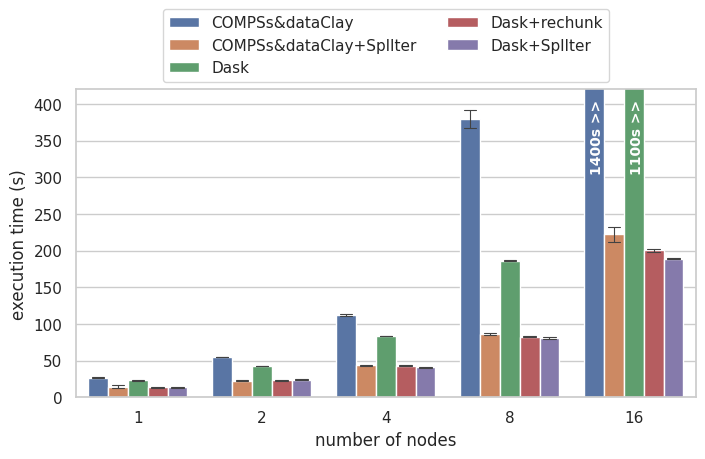

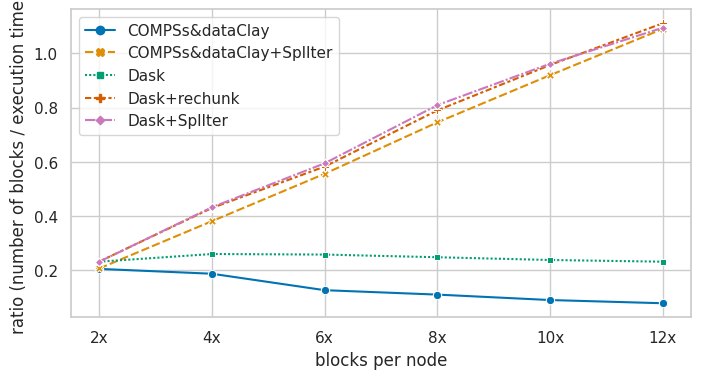

In [21]:
sns.set(style="whitegrid", color_codes=True)

#hue_order=["COMPSs", "dataClay[no copy]", "dataClay+split[no copy]", "dataClay", "dataClay+split"]
# hue_order=["dataClay[no copy]", "dataClay+split[no copy]", 
#            "zdask[no copy]", "zdask+rechunk[no copy]", "zdask+split[no copy]",
#            "dataClay", "dataClay+split", "zdask", "zdask+rechunk", "zdask+split"]

hue_order=["dataClay", "dataClay+split", "zdask", "zdask+rechunk", "zdask+split"]

ax = sns.barplot(y="kneighbors_time", x="nodes", hue="mode",
                 data=kneighbors_data,
                 capsize=0.1,
                 errwidth=0.8,
                 errorbar="se",
                 hue_order=hue_order)
                 #palette=sns.color_palette("colorblind")[:3] + sns.color_palette("pastel")[1:3])

# for i, bar in enumerate(ax.patches):
#     if (i > 23):  # experimentally found the proper value == 14
#         bar.set_hatch('//')

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["COMPSs&dataClay", "COMPSs&dataClay+SplIter", "Dask", "Dask+rechunk", "Dask+SplIter"])

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=True,
)

ax.set_ylabel("execution time (s)")
ax.set_xlabel("number of nodes")
ax.set_ylim([0, 420])

ax.text(3.7, 420, "1400s >>  ", ha="center", va="top", rotation=90, color="white", weight="semibold", fontsize=10)
ax.text(4.03, 420, "1100s >>  ", ha="center", va="top", rotation=90, color="white", weight="semibold", fontsize=10)

save_tweaks("kneighbors-weakscaling.pdf")
plt.show()

ax = sns.lineplot(data=mean_data, style="mode", 
                  markers=True, x="n_blocks_fit", 
                  hue="mode", y="speedup", 
                  palette="colorblind")

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["COMPSs&dataClay", "COMPSs&dataClay+SplIter", "Dask", "Dask+rechunk", "Dask+SplIter"])
ax.set_ylabel("ratio (number of blocks / execution time)")
ax.set_xlabel("blocks per node")
ax.set(xticks=[16, 32, 48, 64, 80, 96], xticklabels=["2x", "4x", "6x", "8x", "10x", "12x"])

save_tweaks("kneighbors-grow.pdf")
plt.show()

/home/alex/BSC/split-miniapps/venv/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


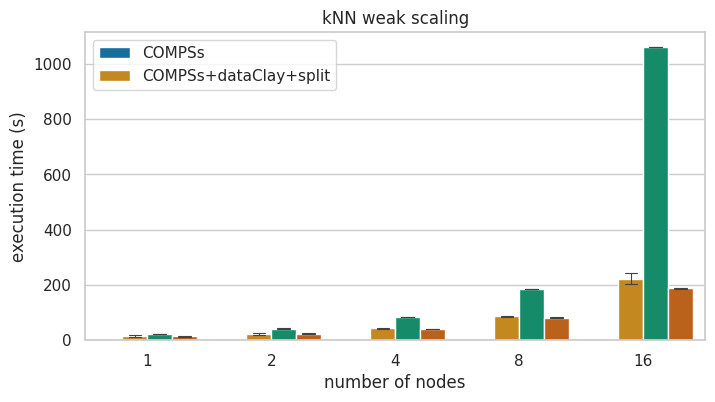

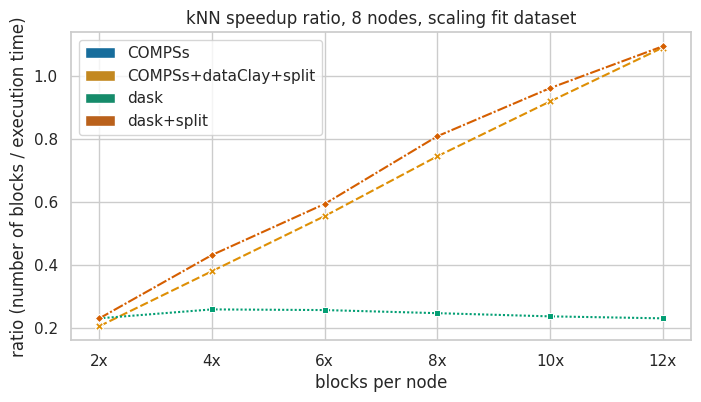

In [13]:
hue_order=["COMPSs", "dataClay+split", "zdask", "zdask+split"]

ax = sns.barplot(y="kneighbors_time", x="nodes", hue="mode",
                 data=kneighbors_data,
                 capsize=0.1,
                 errwidth=0.8,
                 hue_order=hue_order,
                 palette="colorblind")

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["COMPSs", "COMPSs+dataClay+split"])
ax.set_title("kNN weak scaling")
ax.set_ylabel("execution time (s)")
ax.set_xlabel("number of nodes")

save_tweaks("knn-anotherpresentation.png")
plt.show()

ax = sns.lineplot(data=mean_data, style="mode", 
                  markers=True, x="n_blocks_fit", 
                  hue="mode", y="speedup", 
                  hue_order=hue_order,
                  palette="colorblind")

ax.legend().title = ""
ax.set_ylabel("ratio (number of blocks / execution time)")
ax.set_xlabel("blocks per node")
ax.legend(h, ["COMPSs", "COMPSs+dataClay+split", "dask", "dask+split"])
ax.set_title("kNN speedup ratio, 8 nodes, scaling fit dataset")
ax.set(xticks=[16, 32, 48, 64, 80, 96], xticklabels=["2x", "4x", "6x", "8x", "10x", "12x"])

save_tweaks("kneighbors-anotherpresentationgrow.png")
plt.show()


# Characterization and time distribution

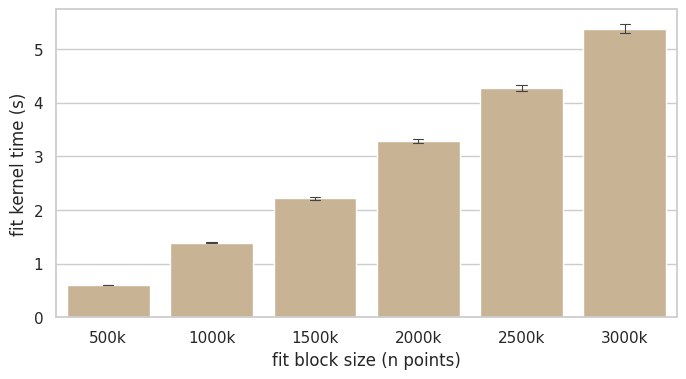

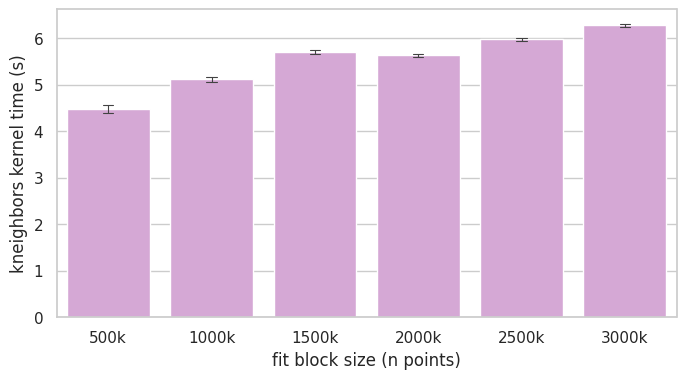

In [14]:
df = pd.read_csv("data_nn_benchmark.csv")
ax = sns.barplot(x="multiplier", y="fit", data=df,
                 capsize=0.1, errwidth=0.8,
                 color="tan")

ax.set_ylabel("fit kernel time (s)")
ax.set_xlabel("fit block size (n points)")
ax.set_xticklabels(["500k", "1000k", "1500k", "2000k", "2500k", "3000k"])

save_tweaks("kneighbors-kernel-fit.pdf")

plt.show()

ax = sns.barplot(x="multiplier", y="kneighbors", data=df,
                 capsize=0.1, errwidth=0.8,
                 color="plum")

ax.set_ylabel("kneighbors kernel time (s)")
ax.set_xlabel("fit block size (n points)")
ax.set_xticklabels(["500k", "1000k", "1500k", "2000k", "2500k", "3000k"])

save_tweaks("kneighbors-kernel-kneighbors.pdf")

plt.show()


## Projection

In [15]:
vals = df.groupby(["multiplier"]).mean()
vals

,fit,kneighbors
multiplier,,
1,0.605050,4.470842
2,1.393670,5.115471
3,2.220747,5.707581
4,3.280972,5.635106
5,4.266676,5.972647
6,5.380411,6.277319


In [16]:
def eval_and_print(n_fits, size_fit):
    
    time_fit = vals["fit"][size_fit]
    agg_fit = time_fit * (n_fits // size_fit)
    time_kn = vals["kneighbors"][size_fit] * (n_fits // size_fit)
    agg_kn = time_kn * 24
    total = time_fit + time_kn
    ratio = time_fit / total * 100
    print("& %d & %.2f & %.2f & %.2f & %.2f & %.2f & %.1f\\%% \\\\" % (size_fit, agg_fit, time_fit, agg_kn, time_kn, total, ratio))
    

print("24 blocks, 1 fit")
eval_and_print(1, 1)

print("24 blocks, 2 fit")

eval_and_print(2, 2)
eval_and_print(2, 1)

print("24 blocks, 4 fit")

eval_and_print(4, 4)
eval_and_print(4, 2)
eval_and_print(4, 1)

print("24 blocks, 6 fit")

eval_and_print(6, 6)
eval_and_print(6, 3)
eval_and_print(6, 2)
eval_and_print(6, 1)

24 blocks, 1 fit
& 1 & 0.61 & 0.61 & 107.30 & 4.47 & 5.08 & 11.9\% \\
24 blocks, 2 fit
& 2 & 1.39 & 1.39 & 122.77 & 5.12 & 6.51 & 21.4\% \\
& 1 & 1.21 & 0.61 & 214.60 & 8.94 & 9.55 & 6.3\% \\
24 blocks, 4 fit
& 4 & 3.28 & 3.28 & 135.24 & 5.64 & 8.92 & 36.8\% \\
& 2 & 2.79 & 1.39 & 245.54 & 10.23 & 11.62 & 12.0\% \\
& 1 & 2.42 & 0.61 & 429.20 & 17.88 & 18.49 & 3.3\% \\
24 blocks, 6 fit
& 6 & 5.38 & 5.38 & 150.66 & 6.28 & 11.66 & 46.2\% \\
& 3 & 4.44 & 2.22 & 273.96 & 11.42 & 13.64 & 16.3\% \\
& 2 & 4.18 & 1.39 & 368.31 & 15.35 & 16.74 & 8.3\% \\
& 1 & 3.63 & 0.61 & 643.80 & 26.83 & 27.43 & 2.2\% \\


In [17]:
df

,multiplier,fit,kneighbors
0,1,0.606567,4.153794
1,2,1.373151,4.898035
2,3,1.997973,5.620861
3,4,3.255817,5.555255
4,5,4.223060,5.887625
5,6,4.888031,6.332208
6,1,0.588021,4.320233
7,2,1.347827,5.010983
8,3,2.257174,5.552305
9,4,3.094960,5.652379
